In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path
import ark
import spatialdata as sd
import spatialdata_plot


/opt/homebrew/Caskroom/mambaforge/base/envs/ark-spatial-dev/lib/python3.11/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'shuffle' has been deprecated; please use 'dataframe.shuffle.algorithm' instead
  warnings.warn(


Load the Zarr Store as a Spatial Data Object

In [ ]:
sdata = sd.read_zarr(store="../../data/cohorts/example_cohort.ome.zarr")

/opt/homebrew/Caskroom/mambaforge/base/envs/ark-spatial-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
sdata

SpatialData object with:
├── Images
│     ├── 'fov0': SpatialImage[cyx] (22, 512, 512)
│     ├── 'fov1': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov2': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov3': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov4': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov5': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov6': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov7': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov8': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov9': SpatialImage[cyx] (22, 1024, 1024)
│     └── 'fov10': SpatialImage[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'fov0_nuclear': SpatialImage[yx] (512, 512)
│     ├── 'fov0_whole_cell': SpatialImage[yx] (512, 512)
│     ├── 'fov1_nuclear': SpatialImage[yx] (1024, 1024)
│     ├── 'fov1_whole_cell': SpatialImage[yx] (1024, 1024)
│     ├── 'fov2_nuclear': SpatialImage[yx] (1024, 1024)
│     ├── 'fov2_whole_cell': SpatialImage[yx] (1024, 1024)
│     ├── 'fov3_nuclear': Spat

In [ ]:
nucs = ["H3K9ac", "H3K27me3"]
mems = ["CD14", "CD45", "ECAD"]

In [ ]:
fov0_sd = sdata.sel("fov0")

sdata.segmentation._sum_markers("fov0", )

/opt/homebrew/Caskroom/mambaforge/base/envs/ark-spatial-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/mambaforge/base/envs/ark-spatial-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


SpatialData object with:
├── Images
│     └── 'fov0': SpatialImage[cyx] (22, 512, 512)
├── Labels
│     ├── 'fov0_nuclear': SpatialImage[yx] (512, 512)
│     └── 'fov0_whole_cell': SpatialImage[yx] (512, 512)
└── Table
      └── AnnData object with n_obs × n_vars = 1056 × 22
    obs: 'equivalent_diameter', 'axis_major_length', 'instance_id', 'area', 'eccentricity', 'area_convex', 'x_centroid', 'y_centroid', 'axis_minor_length', 'perimeter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_equiv_diam_ratio', 'centroid_dif', 'num_concavities', 'region'
    uns: 'spatialdata_attrs'
    obsm: 'spatial': AnnData (1056, 22)
with coordinate systems:
▸ 'fov0', with elements:
        fov0 (Images), fov0_nuclear (Labels), fov0_whole_cell (Labels)
▸ 'global', with elements:
        fov0 (Images)

In [ ]:
sdata.segmentation.run_deepcell(nucs=nucs, mems=mems)

In [ ]:
sdata


/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


TypeError: object of type 'Axes' has no len()

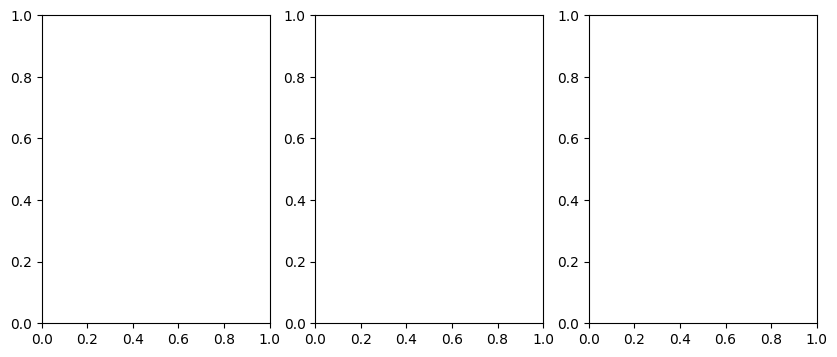

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 4))

sdata_fov0 = sdata.sel("fov0")

sdata_fov0.pl.render_images().pl.show(ax=axs[0], title="image")

sdata_fov0.pl.render_labels().pl.show(ax=axs[1], title="labels")

sdata_fov0.pl.render_images().pl.render_labels().pl.show(ax=axs[2], title="both")

plt.tight_layout()